# Decision Tree Regression

CART : Classification and Regression Trees, there are two types of decision trees. In this section, we will be focused on the Regression trees. 

They are a bit more complex than Classification trees.

<img src="img/0_Intro_Graph.png" width="600" height="300">

If you see the scatter plot above a representation of our dataset .

We have 2 independent variables (features X1, X2) to prodict Y (depedent variable) which is in third dimension (projections of all the points).

When we run a regression decision tree the scatter will be split up into segments.

<img src="img/1_Intro_Graph_Split.png" width="600" height="300">

How and when the split are conducted ? This is determined by the algorithm and it involves looking at an information called ["entropy"](http://www.saedsayad.com/decision_tree.htm). It means that when I perform the split, is these splits increasing the amount of information that we have about our points. Is it actually adding some value to our way to group the points. 

The algorithm knows when to stop; its when we can't add more information into the leaves/splits (ex: Stop when you have less than 5% of the total in one leaf)

Lets create our Decision tree :

The Split started at X1 < 20

<img src="img/1_Intro_Graph_Split1.png" width="600" height="300">

<img src="img/1_Intro_Graph_Split1A.png" width="600" height="300">

Next happens Split 2 which start at point X2 < 170 .

<img src="img/1_Intro_Graph_Split2.png" width="600" height="300">

<img src="img/1_Intro_Graph_Split2A.png" width="600" height="300">

Next Split 3 check if X2 < 200

<img src="img/1_Intro_Graph_Split3.png" width="600" height="300">

<img src="img/1_Intro_Graph_Split3A.png" width="600" height="300">

And for same for Split 4 (x < 40)

<img src="img/1_Intro_Graph_Split4.png" width="600" height="300">

<img src="img/1_Intro_Graph_Split4A.png" width="600" height="300">

How the information (X1 and X2) splitted into leaves will help us to predict Y ?

It's pretty straight forward, it will take the average of y  for each terminal leaves.

<img src="img/1_Intro_Graph_Final.png" width="600" height="300">

<img src="img/1_Intro_Graph_FinalA.png" width="600" height="300">


Now let's begin with our example and import our dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

plt.scatter(dataset['Level'], dataset['Salary'])
plt.show() 

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [2]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [3]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [9]:
# Predicting a new result
y_pred = regressor.predict(6.5)

y_pred[0]

150000.0

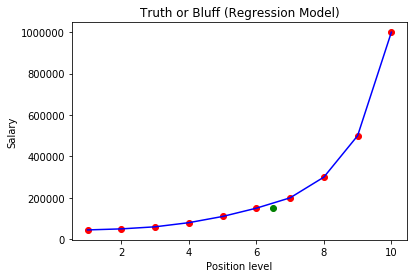

In [10]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.scatter(6.5, y_pred, color = 'green')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Now we have a non linear and non continous model that's why the viz above is not correct.

The decision tree model is not continuous, so we need to visualize the regression model with a better resolution

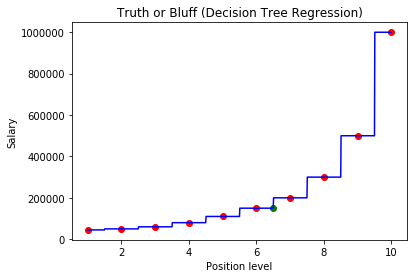

In [13]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(6.5, y_pred, color = 'green')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()